In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
## Question 8

data = {
    'Name': ['P. Lee', 'R. Jones', 'J. Smith', 'A. Patel', 'M. Owen',
             'S. Green', 'N. Cook', 'W. Hands', 'P. Rice', 'F. Marsh'],
   'Weight (kg)': [50, 115, 96, 41, 79, 109, 73, 104, 64, 136],
    'Height (m)': [1.52, 1.77, 1.83, 1.55, 1.82, 1.89, 1.76, 1.71, 1.74, 1.78],
    'Systolic Blood Pressure (mm Hg)': [68, 110, 88, 76, 65, 114, 108, 107, 101, 121],
    'Diastolic Blood Pressure (mm Hg)': [112, 154, 136, 125, 105, 159, 136, 145, 132, 165],
    'Diabetes': [0, 1, 0, 0, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# a) Normalized Weight = (Weight−Min Weight)/(Max Weight−Min Weight)
min_wgt = df['Weight (kg)'].min()
max_wgt = df['Weight (kg)'].max()
df['Normalized Weight'] = (df['Weight (kg)']-min_wgt)/(max_wgt-min_wgt)

# b) binning the Weight (kg)
df['Weight Category'] = pd.cut(df['Weight (kg)'], bins=[0, 60, 100, float('inf')], labels=['low', 'medium', 'high'])

# c) BMI = Weight(kg)/(Height(m))**2

df['BMI (kg/m²)'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

df

,Name,Weight (kg),Height (m),Systolic Blood Pressure (mm Hg),Diastolic Blood Pressure (mm Hg),Diabetes,Normalized Weight,Weight Category,BMI (kg/m²)
0,P. Lee,50,1.52,68,112,0,0.094737,low,21.641274
1,R. Jones,115,1.77,110,154,1,0.778947,high,36.707204
2,J. Smith,96,1.83,88,136,0,0.578947,medium,28.666129
3,A. Patel,41,1.55,76,125,0,0.000000,low,17.065557
4,M. Owen,79,1.82,65,105,0,0.400000,medium,23.849777
5,S. Green,109,1.89,114,159,1,0.715789,high,30.514263
6,N. Cook,73,1.76,108,136,0,0.336842,medium,23.566632
7,W. Hands,104,1.71,107,145,1,0.663158,high,35.566499
8,P. Rice,64,1.74,101,132,0,0.242105,medium,21.138856
9,F. Marsh,136,1.78,121,165,1,1.000000,high,42.923873


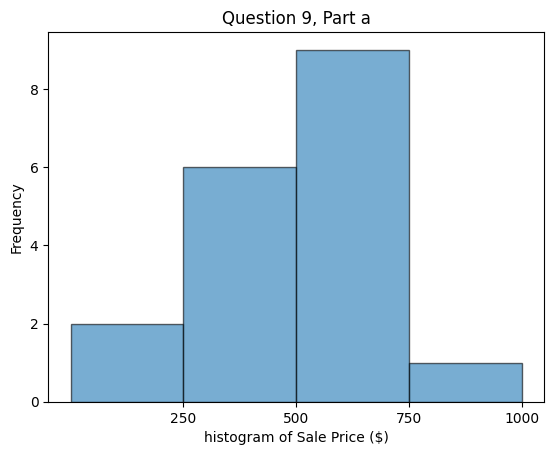

In [128]:
## Question 9
## a)
data = {
    'Customer': ['B. March', 'B. March', 'B. March', 'J. Bain', 'T. Goss', 'T. Goss', 'L. Nye', 'L. Nye', 'S. Cann', 'E. Sims', 'P. Judd', 'P. Judd', 'G. Hinton', 'G. Hinton', 'G. Hinton', 'G. Hinton', 'H. Fu', 'H. Taylor'],
    'Store': ['New York, NY', 'New York, NY', 'New York, NY', 'New York, NY', 'Washington, DC', 'Washington, DC', 'New York, NY', 'New York, NY', 'Washington, DC', 'Washington, DC', 'New York, NY', 'New York, NY', 'Washington, DC', 'Washington, DC', 'Washington, DC', 'Washington, DC', 'New York, NY', 'New York, NY'],
    'Product Category': ['Laptop', 'Printer', 'Scanner', 'Scanner', 'Printer', 'Scanner', 'Desktop', 'Printer', 'Desktop', 'Laptop', 'Desktop', 'Scanner', 'Laptop', 'Desktop', 'Printer', 'Scanner', 'Desktop', 'Scanner'],
    'Product Description': ['DR2984', 'FW288', 'BW9338', 'BW9443', 'FW199', 'BW39339', 'LR21', 'FW299', 'LR21', 'DR2983', 'LR22', 'FJ3999', 'DR2983', 'LR21', 'FW288', 'BW9443', 'ZX88', 'BW9338'],
    'Sale Price ($)': [950, 350, 400, 500, 200, 550, 600, 300, 600, 700, 700, 200, 700, 600, 350, 500, 450, 400],
    'Profit ($)': [190, 105, 100, 125, 60, 140, 60, 90, 60, 140, 70, 50, 140, 60, 105, 125, 45, 100]
}
df = pd.DataFrame(data)
plt.hist(df['Sale Price ($)'], bins=[0,250,500,750,1000], edgecolor='black', alpha = 0.6)
plt.xticks([250,500,750,1000])
plt.xlabel('histogram of Sale Price ($)')
plt.ylabel('Frequency')
plt.title('Question 9, Part a')
plt.show()


In [129]:
## Question 9
## Part b
contingency_table = pd.crosstab(df['Store'], df['Product Category'])
print(contingency_table)

Product Category  Desktop  Laptop  Printer  Scanner
Store                                              
New York, NY            3       1        2        4
Washington, DC          2       2        2        2


In [130]:
# Question 9
# Part c
## c-i

# by Customer
customer_summary = df.groupby('Customer').agg(Number_of_Transactions=('Sale Price ($)', 'size'),Total_Sale_Price=('Sale Price ($)', 'sum')).reset_index()

print(customer_summary)

    Customer  Number_of_Transactions  Total_Sale_Price
0   B. March                       3              1700
1    E. Sims                       1               700
2  G. Hinton                       4              2150
3      H. Fu                       1               450
4  H. Taylor                       1               400
5    J. Bain                       1               500
6     L. Nye                       2               900
7    P. Judd                       2               900
8    S. Cann                       1               600
9    T. Goss                       2               750


In [131]:
# Question 9, Part c
# ii
# Group by Store
store_summary = df.groupby('Store').agg(Number_of_Transactions=('Sale Price ($)', 'size'),Mean_Sale_Price=('Sale Price ($)', 'mean')).reset_index()

print(store_summary)


            Store  Number_of_Transactions  Mean_Sale_Price
0    New York, NY                      10            485.0
1  Washington, DC                       8            525.0


In [132]:
# Question 9, Part c
# iii
# Group by Product Category
product_summary = df.groupby('Product Category').agg(Number_of_Transactions=('Profit ($)', 'size'),Total_Profit=('Profit ($)', 'sum')).reset_index()

print(product_summary)

  Product Category  Number_of_Transactions  Total_Profit
0          Desktop                       5           295
1           Laptop                       3           470
2          Printer                       4           360
3          Scanner                       6           640


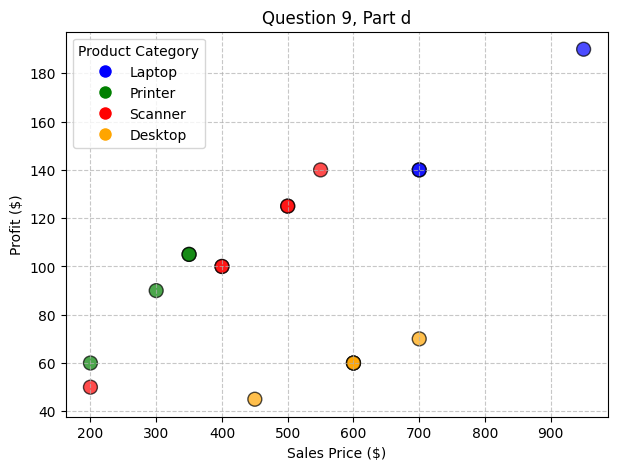

In [133]:
## Question 9, Part d
## d. Create a scatterplot showing Sales price ($) against Profit ($).

color_map = {
    'Laptop': 'blue',
    'Printer': 'green',
    'Scanner': 'red',
    'Desktop': 'orange'
}
colors = df['Product Category'].map(color_map)

plt.figure(figsize=(7, 5))
plt.scatter(df['Sale Price ($)'], df['Profit ($)'], c=colors, s=100, alpha=0.7, edgecolor='black', marker = 'o')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Sales Price ($)')
plt.ylabel('Profit ($)')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]
plt.legend(handles, color_map.keys(), title="Product Category", loc='upper left')
plt.title('Question 9, Part d')
plt.show()



In [134]:
import seaborn as sns
A1data = "/content/A1_030fe004-1e17-4bd1-b3fa-539cc3f90961.csv"
df = pd.read_csv(A1data)
df.head()

,Sample Number,Classes,Feature 1,Feature 2,Feature 3,Feature 4,Sex
0,1,A,39.2,18.6,190,4250,MALE
1,2,B,45.2,13.8,215,4750,FEMALE
2,3,C,51.9,19.5,206,3950,MALE
3,4,A,42.8,18.5,195,4250,MALE
4,5,B,42.6,13.7,213,4950,FEMALE


In [135]:
# a. Find the frequency of samples for each class
class_counts = df['Classes'].value_counts()
print("Frequency of each class:")
print(class_counts)

Frequency of each class:
Classes
A    151
B    123
C     68
Name: count, dtype: int64


In [136]:
# b. Generate data description and calculate interquartile range (IQR)
df_numeric = df.select_dtypes(include=['number'])
dspt = df_numeric.describe()
iqr = df_numeric.quantile(0.75) - df_numeric.quantile(0.25)
print("\nData Description:")
print(dspt)
print("\nInterquartile Range (IQR):")
iqr


Data Description:
       Sample Number   Feature 1   Feature 2   Feature 3    Feature 4
count     342.000000  342.000000  342.000000  342.000000   342.000000
mean      171.500000   43.921930   17.151170  200.915205  4201.754386
std        98.871128    5.459584    1.974793   14.061714   801.954536
min         1.000000   32.100000   13.100000  172.000000  2700.000000
25%        86.250000   39.225000   15.600000  190.000000  3550.000000
50%       171.500000   44.450000   17.300000  197.000000  4050.000000
75%       256.750000   48.500000   18.700000  213.000000  4750.000000
max       342.000000   59.600000   21.500000  231.000000  6300.000000

Interquartile Range (IQR):


,0
Sample Number,170.500
Feature 1,9.275
Feature 2,3.100
Feature 3,23.000
Feature 4,1200.000


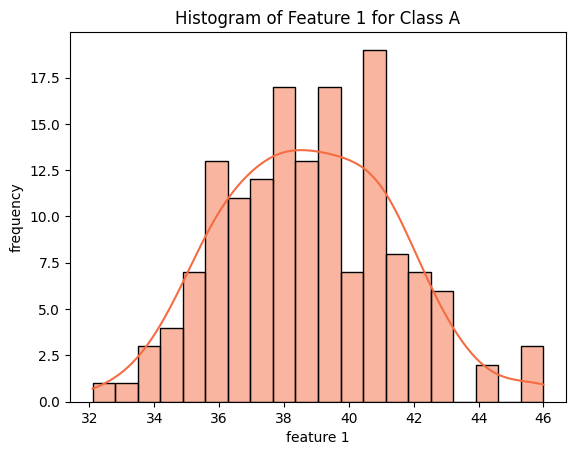

In [137]:
## c. Plot histogram of Feature 1 for class A
sns.histplot(df[df['Classes'] == 'A']['Feature 1'], bins=20, kde=True, color ='#f56c42')
plt.title('Histogram of Feature 1 for Class A')
plt.xlabel('feature 1')
plt.ylabel('frequency')
plt.show()

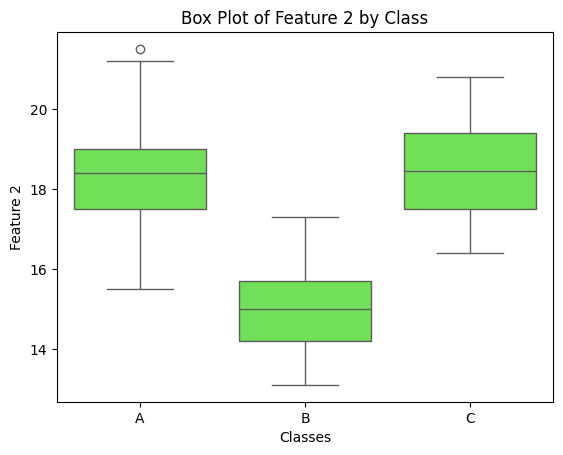

In [138]:
# d) Box plot for Feature 2 for each class separately
sns.boxplot(x='Classes', y='Feature 2', data=df, color = '#63f542')
plt.title('Box Plot of Feature 2 by Class')
plt.show()


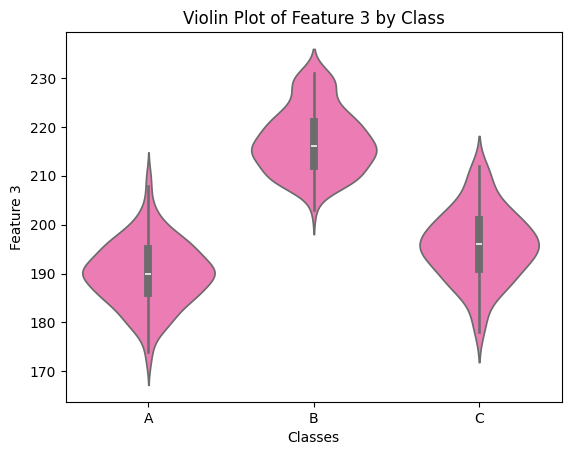

In [139]:
# e) Violin plot for Feature 3 for each class separately
sns.violinplot(x='Classes', y='Feature 3', data=df, color='hotpink')
plt.title('Violin Plot of Feature 3 by Class')
plt.show()

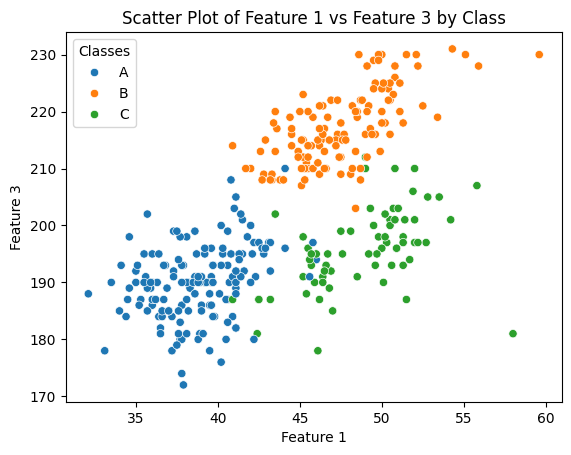

In [140]:
# f)) Scatter plot between Feature 1 and Feature 3 showing classes separately
sns.scatterplot(x='Feature 1', y='Feature 3', hue='Classes', data=df)
plt.title('Scatter Plot of Feature 1 vs Feature 3 by Class')
plt.show()

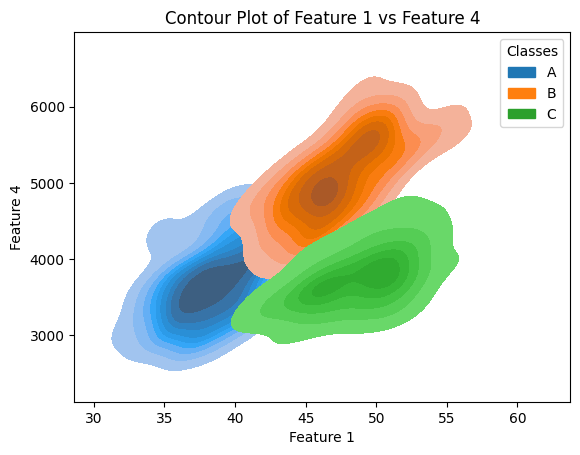

In [141]:
# g. Contour plot between Feature 1 and Feature 4 showing classes separately
sns.kdeplot(data=df, x='Feature 1', y='Feature 4', hue='Classes', fill=True)
plt.title('Contour Plot of Feature 1 vs Feature 4')
plt.show()

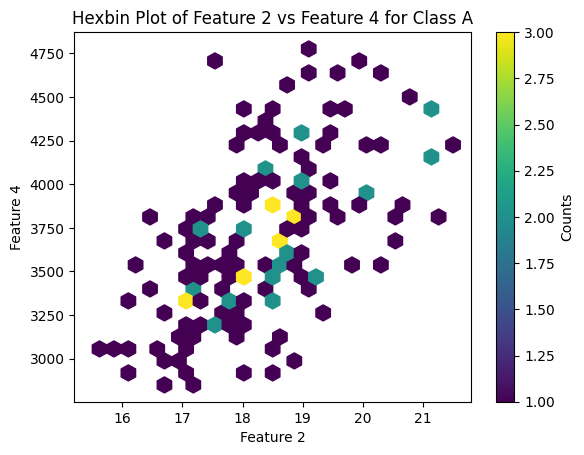

In [142]:
# h. Hexagonal bin plot for class A between Feature 2 and Feature 4
clsA = df[df['Classes'] == 'A']
plt.hexbin(clsA['Feature 2'], clsA['Feature 4'], gridsize=25, cmap='viridis', mincnt=1)
plt.colorbar(label='Counts')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')
plt.title('Hexbin Plot of Feature 2 vs Feature 4 for Class A')
plt.show()

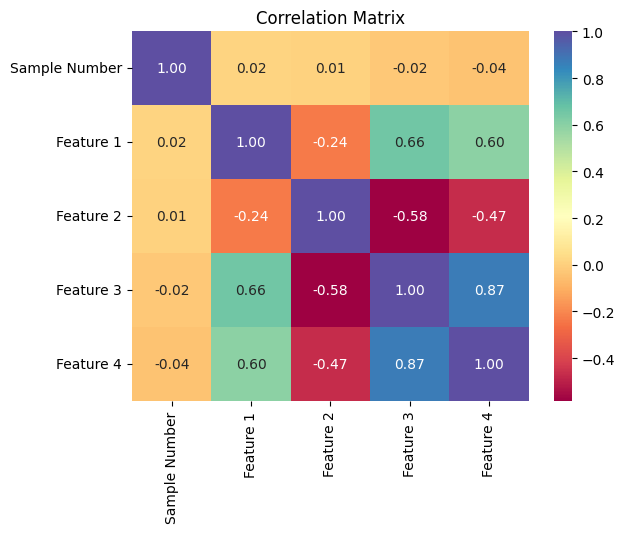

In [143]:
# i. Correlation matrix for the four features
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

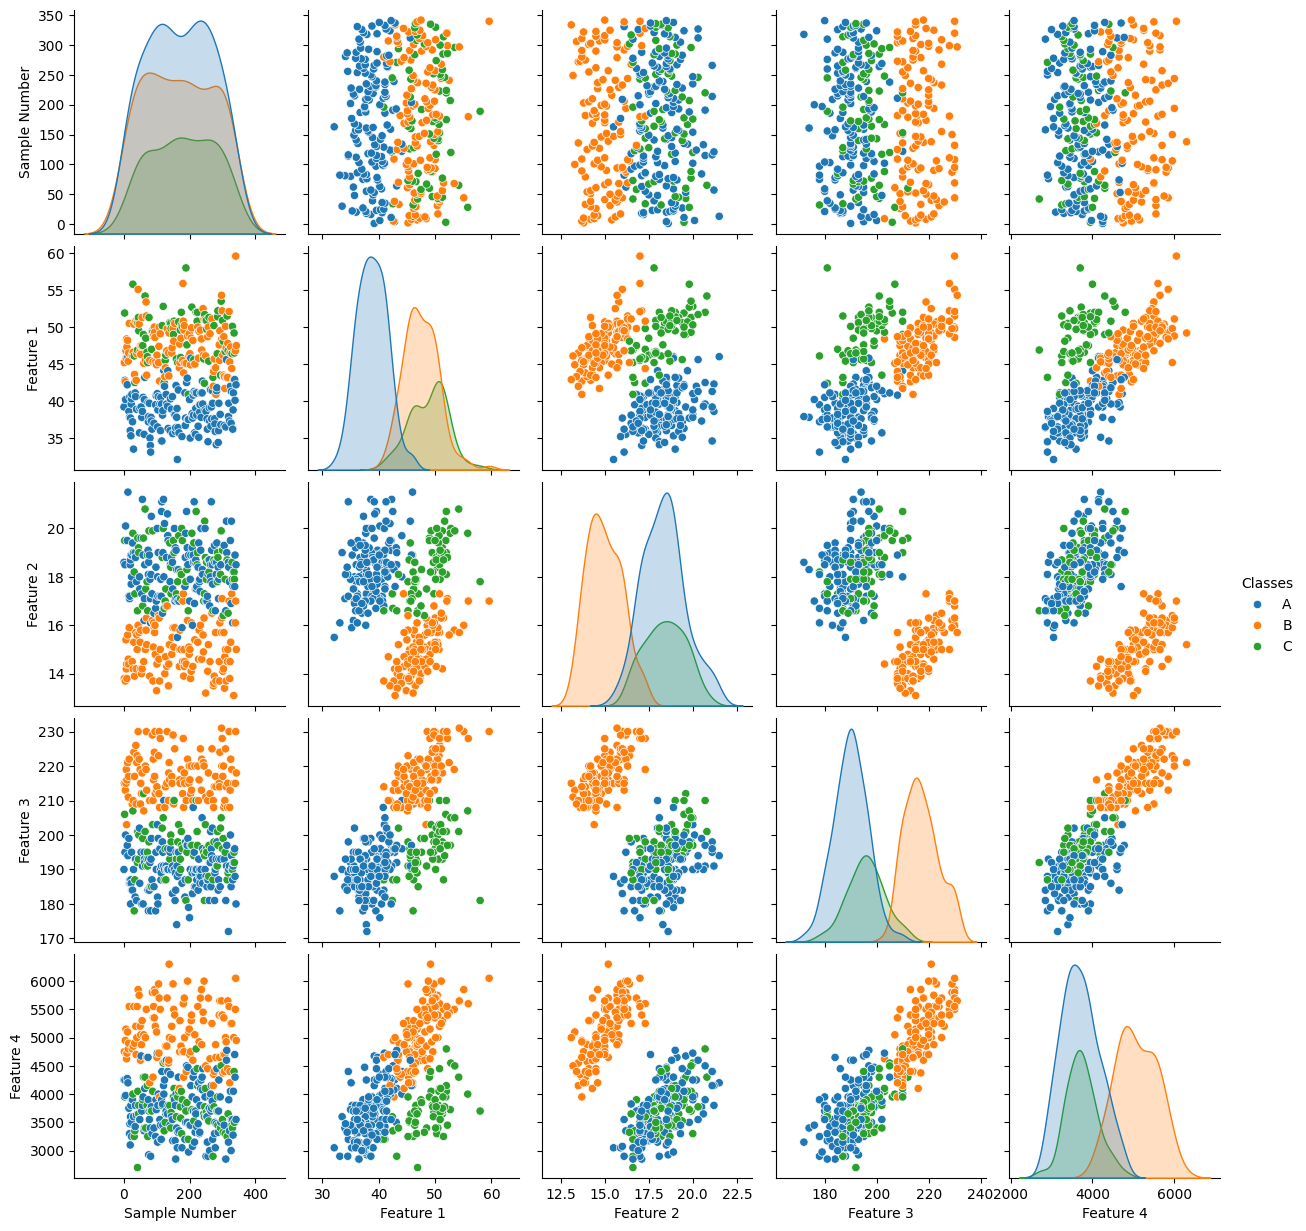

In [144]:
### j. Pair plot for the four features showing classes separately
sns.pairplot(df, hue='Classes')
plt.show()